# K-Nearest Neighbors Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Setup

### Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

Sepal length  Sepal width  Petal length  Petal width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### A simple visualization

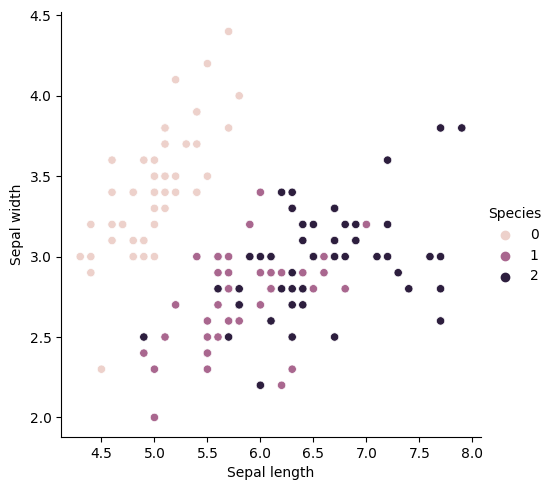

In [5]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
X_train[:5]

Sepal length  Sepal width  Petal length  Petal width
118           7.7          2.6           6.9          2.3
120           6.9          3.2           5.7          2.3
93            5.0          2.3           3.3          1.0
69            5.6          2.5           3.9          1.1
24            4.8          3.4           1.9          0.2

### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train[:5]

array([[ 2.27184218, -1.02396111,  1.80797693,  1.54156604],
       [ 1.30809119,  0.34894764,  1.12998558,  1.54156604],
       [-0.98081741, -1.71041548, -0.22599712, -0.2074107 ],
       [-0.25800417, -1.25277923,  0.11299856, -0.07287403],
       [-1.22175516,  0.80658389, -1.01698703, -1.28370408]])

## K-Nearest Neighbors

In [10]:
k = 1

In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy: 0.9333333333333333


## Best k

In [14]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [15]:
knn_tuning(1)

0.9333333333333333

In [16]:
knn_tuning(5)

0.9333333333333333

In [17]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})

In [18]:
knn_results['K']

0       1
1       6
2      11
3      16
4      21
5      26
6      31
7      36
8      41
9      46
10     51
11     56
12     61
13     66
14     71
15     76
16     81
17     86
18     91
19     96
20    101
21    106
22    111
23    116
Name: K, dtype: int64

In [19]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy']

0     0.933333
1     1.000000
2     1.000000
3     0.966667
4     0.966667
5     0.966667
6     0.966667
7     0.933333
8     0.933333
9     0.933333
10    0.933333
11    0.933333
12    0.833333
13    0.833333
14    0.866667
15    0.666667
16    0.600000
17    0.633333
18    0.633333
19    0.600000
20    0.600000
21    0.600000
22    0.600000
23    0.566667
Name: Accuracy, dtype: float64

In [20]:
knn_results

K  Accuracy
0     1  0.933333
1     6  1.000000
2    11  1.000000
3    16  0.966667
4    21  0.966667
5    26  0.966667
6    31  0.966667
7    36  0.933333
8    41  0.933333
9    46  0.933333
10   51  0.933333
11   56  0.933333
12   61  0.833333
13   66  0.833333
14   71  0.866667
15   76  0.666667
16   81  0.600000
17   86  0.633333
18   91  0.633333
19   96  0.600000
20  101  0.600000
21  106  0.600000
22  111  0.600000
23  116  0.566667

## Optimize weights

In [21]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [22]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [23]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results

K  Accuracy   Uniform  Distance
0     1  0.933333  0.933333  0.933333
1     6  1.000000  1.000000  0.966667
2    11  1.000000  1.000000  1.000000
3    16  0.966667  0.966667  0.966667
4    21  0.966667  0.966667  0.966667
5    26  0.966667  0.966667  0.966667
6    31  0.966667  0.966667  0.966667
7    36  0.933333  0.933333  0.966667
8    41  0.933333  0.933333  0.966667
9    46  0.933333  0.933333  0.933333
10   51  0.933333  0.933333  0.933333
11   56  0.933333  0.933333  0.933333
12   61  0.833333  0.833333  0.933333
13   66  0.833333  0.833333  0.966667
14   71  0.866667  0.866667  0.966667
15   76  0.666667  0.666667  0.966667
16   81  0.600000  0.600000  0.966667
17   86  0.633333  0.633333  0.966667
18   91  0.633333  0.633333  0.966667
19   96  0.600000  0.600000  0.966667
20  101  0.600000  0.600000  0.966667
21  106  0.600000  0.600000  0.966667
22  111  0.600000  0.600000  0.966667
23  116  0.566667  0.566667  0.966667